# Generate Figure 3 for Kaiser et al. 2020 Science paper

This is the same message at the beginning of all jupyter notebooks in this directory. 

If you don't have the below packages, you obviously need to install them for this to work. If it doesn't work still it's extremely likely you have an outdated version of one of the packages. Alternatively, some of the histogram functions actually rely on not being the most recent version because they changed from "normed" to something else from my recollection. Or perhaps it was the other way. I am aware this was poor decision-making, but it works (if you use the right version). ¯\\_(ツ)_/¯

Also pretty much all of these commands are copied and pasted from another Jupyter notebook I made but contained tons of tries at doing this stuff (and unrelated efforts) so that's why a lot of the variables seem unnecessary to use.

In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
from astropy.io import fits
from glob import glob
from astropy.time import Time
from astropy import coordinates as coords
from astropy import units as u
from astropy import constants as const
from astropy import convolution as conv
from astropy.table import Table, Column
import scipy.interpolate as scinterp
import time
start = time.time()

import spec_plot_tools as spt
import cal_params as cp
import plot_spec as ps
import bensby_plotting as bp
print(os.getcwd())



no file_setting specificied


/Users/BenKaiser/Desktop/abd1714_Kaiser_et_al_2020_Science


In [2]:
target_dir= '/Users/BenKaiser/Desktop/GaiaJ1644m0449_paper/'
os.chdir(target_dir)

In [3]:
wd_abund_file='temp_wd_abundances.csv'
lodders_abund_file='Lodders2009_solarsystem_abundances.csv'

In [4]:
wd_abund_table=Table.read(wd_abund_file)
wd_abund_table.add_index('name')

In [5]:
lodders_table=Table.read(lodders_abund_file)
lodders_table.add_index('element')
solar_lica=lodders_table.loc['Li']['A_el']-lodders_table.loc['Ca']['A_el']

In [6]:
color_dict={
    'GaiaJ1644-0449':'r',
    'SDSSJ1330+6435':'darkviolet',
    'WDJ2356-209':'#44b839'
}
step_dict={
    'GaiaJ1644-0449':10,
    'SDSSJ1330+6435':0.1,
    'WDJ2356-209':10
}

wd_marker='*'
met_marker='D'
met_color='#1ca1f2'
ci_size=14
ci_leg_size=10
wd_size=14
dp_alpha=1
arr_naca=[-0.4,-0.1]

star_marker='o'
pop_colors=['darkorange','brown','navy','grey'] #thin disk, thick disk, halo, in-between for Bensby plots




In [7]:

def plot_lica_age(row,sol_norm=True,lica_string='li/ca', color=None, use_central_vals=True):
    
    age_errs= [[row['age_minus']],[row['age_plus']]]
    #age_errs= row['age_plus'],row['age_minus']
    #age_errs=[row['age_minus'],row['age_plus']]
    lica_err= row[lica_string+'_err']
    #print('age_errs',age_errs.shape)
    #plt.errorbar(row['age'],row[lica_string],xerr=row['age_minus'],label=row['name'],marker='o')
    if use_central_vals:
        if row['name']=='WDJ2356-209':
            if sol_norm:
                plt.errorbar(float(row['age']),row[lica_string]-solar_lica,marker=wd_marker, label=row['name'],color=color_dict[row['name']],markersize=wd_size, linestyle='None')
                plt.errorbar(float(row['age']),row[lica_string]-solar_lica,xerr=age_errs,yerr=0.3,marker=wd_marker, uplims=True,color=color_dict[row['name']],markersize=wd_size, linestyle='None')
                plt.ylabel('[Li/Ca]')
            else:
                plt.errorbar(float(row['age']),row[lica_string],marker=wd_marker, label=row['name'],color=color_dict[row['name']],markersize=wd_size, linestyle='None')
                plt.errorbar(float(row['age']),row[lica_string],xerr=age_errs,yerr=0.3,marker=wd_marker, uplims=True,color=color_dict[row['name']],markersize=wd_size, linestyle='None')
        else:
            if sol_norm:
                plt.errorbar(float(row['age']),row[lica_string]-solar_lica,xerr=age_errs,label=row['name'],yerr=lica_err,marker=wd_marker, color=color_dict[row['name']],markersize=wd_size, linestyle='None')
                plt.ylabel('[Li/Ca]')
            else:
                plt.errorbar(float(row['age']),row[lica_string],xerr=age_errs,label=row['name'],yerr=lica_err,marker=wd_marker,color=color_dict[row['name']],markersize=wd_size, linestyle='None')
                plt.ylabel(r'$\log_{10}$(Li/Ca)')
    else:
        #doing upper limits only because we don't know the phase.
        lica_val=row[lica_string]+3*lica_err #3-sigma upper side of the distribution
        plt.errorbar(float(row['age']),lica_val,marker=wd_marker, label=row['name'],color=color_dict[row['name']],markersize=wd_size, linestyle='None')
        plt.errorbar(float(row['age']),lica_val,xerr=age_errs,yerr=0.3,marker=wd_marker,uplims=True,color=color_dict[row['name']],markersize=wd_size, linestyle='None')
        plt.ylabel(r'$\log$(Li/Ca)')
    return

       B_ALi        
--------------------
0.030000000000000027
 0.10000000000000009
 0.06000000000000005
 0.06000000000000005
 0.04999999999999982
 0.06000000000000005
 0.04999999999999982
                  --
0.039999999999999813
0.050000000000000266
                 ...
 0.06000000000000005
0.040000000000000036
                  --
0.040000000000000036
 0.06000000000000005
                  --
0.040000000000000036
 0.08999999999999986
                  --
                  --
                0.06
Length = 714 rows
<class 'astropy.table.column.MaskedColumn'>
star_age.shape (714,)
in_range (array([  5,  11,  13,  14,  34,  36,  39,  47,  64,  74,  83, 109, 112,
       134, 137, 151, 158, 163, 185, 186, 245, 273, 274, 277, 283, 295,
       318, 331, 335, 340, 368, 420, 438, 442, 469, 472, 478, 488, 495,
       496, 520, 590, 593, 596, 600, 606, 613, 621, 629, 636, 638, 641,
       643, 649, 664, 687, 689]),)
(714,)
max_index 368
max_lica -5.75
max age 4.0
med_age_error [1.9 1. ]
med_lic

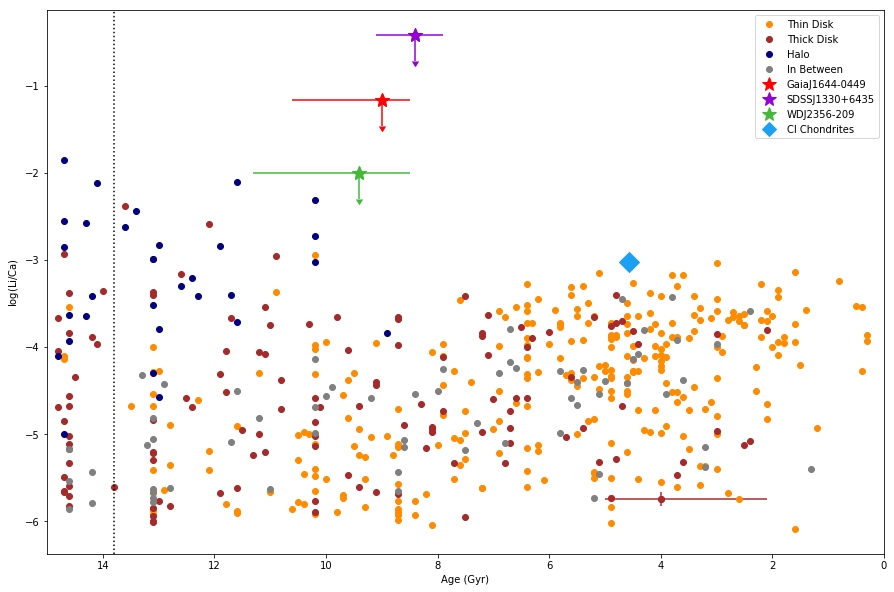

In [11]:
plt.figure(figsize=(15,10))
count=0
bp.plot_lica_age_pop(colors=pop_colors, rep_errors=True, sol_norm=False)
for row in wd_abund_table:
    if count > 2:
        break
    plot_lica_age(row,sol_norm=False,lica_string='li/ca', use_central_vals=False)
    #plot_lica_age(row,sol_norm=False,lica_string='li/ca', use_central_vals=True)
    #if row['name']=='WDJ2356-209':
        
    count+=1
plt.errorbar(4.57,lodders_table.loc['Li']['A_el']-lodders_table.loc['Ca']['A_el'],yerr=np.sqrt(lodders_table.loc['Li']['A_el_err']**2+lodders_table.loc['Ca']['A_el_err']**2),label="CI Chondrites",marker=met_marker, color=met_color, linestyle='None', markersize=ci_leg_size)
plt.errorbar(4.57,lodders_table.loc['Li']['A_el']-lodders_table.loc['Ca']['A_el'],yerr=np.sqrt(lodders_table.loc['Li']['A_el_err']**2+lodders_table.loc['Ca']['A_el_err']**2),marker=met_marker,markersize=ci_size, color=met_color)
#plt.xlim(14,0)
plt.xlim(15,0)


plt.axvline(x=13.8, linestyle=':', color='k')
plt.legend()
#plt.grid(True)
plt.xlabel('Age (Gyr)')
plt.show()

## Ok there are things still need to fix about that:

1. J1644 and J1330 are not upper limits currently, so I need to adapt my analysis to do that

2. The Bensby points are still in solar-normalized units

3. The y-axis explicitly lists base 10, but I need to make all logs essentially baseless

4. Delete this to-do list

## Peculiar